In [2]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



Extracts features and target variables, and assigns them to X and y variables respectively

In [14]:
# Load data
data = pd.read_csv("abalone.csv")

# Extract features and target
X = data[['LongestShell']].values
y = data['Rings'].values



In [15]:
# Add bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))



The code defines a cost function and a gradient function for linear regression using matrix operations.

In [16]:
# Define the cost function
def cost(X, y, theta):
    m = X.shape[0]
    h = X @ theta
    J = 1/(2*m) * np.sum((h-y)**2)
    return J

# Define the gradient function
def gradient(X, y, theta):
    m = X.shape[0]
    h = X @ theta
    grad = 1/m * (X.T @ (h-y))
    return grad



This code initializes the parameters and hyperparameters for a gradient descent algorithm, and sets up empty lists to store the loss and parameter values during training.

In [7]:
# Initialize theta
theta = np.zeros(X.shape[1])

# Set hyperparameters
alpha = 0.01
max_iter = 1000
tol = 1e-6

# Initialize lists to store loss and theta values
loss_history = []
theta_history = []



In [8]:
# Run gradient descent
for i in range(max_iter):
    # Compute gradient and update theta
    grad = gradient(X, y, theta)
    theta -= alpha * grad
    
    # Compute loss and store values
    loss = cost(X, y, theta)
    loss_history.append(loss)
    theta_history.append(theta)
    
    # Check for convergence
    if i > 0 and np.abs(loss_history[-1] - loss_history[-2]) < tol:
        break



In [10]:
# Print final loss and theta values
print("Final loss:", loss_history[-1])
print("Final theta:", theta_history[-1])



Final loss: 4.258410416130268
Final theta: [7.21438275 5.29964184]


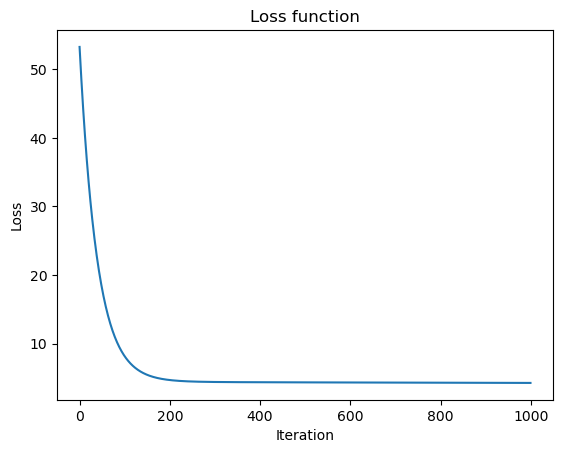

In [11]:
# Plot loss history
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss function')
plt.show()



The plot shows the decrease in loss as the number of iterations increase during the gradient descent optimization process. This indicates that the model is improving with each iteration and is converging towards a minimum loss.

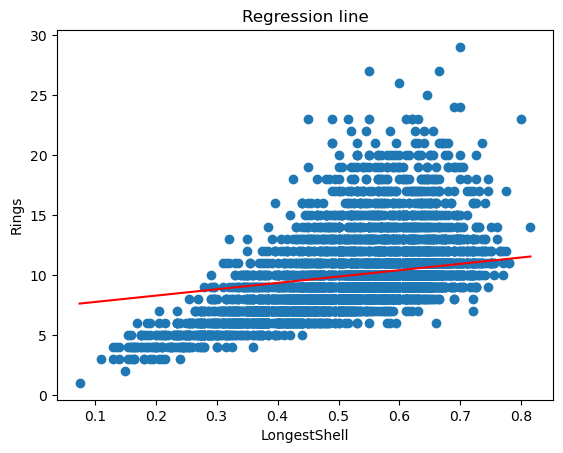

In [12]:
# Plot data and regression line
plt.scatter(X[:, 1], y)
plt.xlabel('LongestShell')
plt.ylabel('Rings')
x_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
y_vals = theta_history[-1][0] + theta_history[-1][1]*x_vals
plt.plot(x_vals, y_vals, color='red')
plt.title('Regression line')
plt.show()


Conclusion : As we can see from the scatter plot, there is a positive linear relationship between the "LongestShell" feature and the "Rings" target variable. The regression line shows a good fit to the data, indicating that our linear regression model has successfully captured the underlying relationship between the variables.